# Traffic Signs Recognition using CNN & Keras

In this Python project example, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

Our approach to building this traffic sign classification model is discussed in four steps:

- Explore the dataset
- Build a CNN model
- Train and validate the model
- Test the model with test dataset

In [1]:
# Import necessary libraries
import numpy as np               # Library for numerical operations
import pandas as pd              # Library for data manipulation and analysis
import matplotlib.pyplot as plt # Library for data visualization
import cv2                       # OpenCV library for computer vision tasks
import os                        # Library for interacting with the operating system
from PIL import Image           # Python Imaging Library for image processing

# Libraries for evaluating model performance
from sklearn.model_selection import train_test_split   # For splitting dataset into train and test sets
from sklearn.preprocessing import LabelEncoder        # For label encoding
from sklearn.metrics import classification_report, confusion_matrix   # For evaluating classification performance

# Deep learning libraries
import tensorflow as tf                               # TensorFlow deep learning framework
from keras.models import Sequential, load_model       # Sequential model for neural networks
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input, concatenate   # Layers for constructing neural networks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau   # Callbacks for training monitoring
from keras.utils import plot_model, to_categorical     # Utility functions for model visualization and data preprocessing
import visualkeras                                    # For visualizing Keras models

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# The Dataset of Python Project

For this project, we are using the public dataset available at Kaggle:

[Traffic Signs Dataset](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/code)

The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images. The size of the dataset is around 300 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.

In [2]:
# loading dataset
data = []     # List to store image data
labels = []   # List to store image labels
classes = 43  # Total number of classes (traffic sign types)
cur_path = '../Traffic Signs Recognition/Train'  # Path to the directory containing the dataset

# Iterate through each directory in the main directory (each directory corresponds to a class)
for i in os.listdir(cur_path):
    dir_path = os.path.join(cur_path, i)  # Path to the current class directory
    
    # Iterate through each image file in the current class directory
    for j in os.listdir(dir_path):
        img_path = os.path.join(dir_path, j)  # Path to the current image
        img = cv2.imread(img_path, -1)         # Read the image using OpenCV
        img = cv2.resize(img, (30, 30), interpolation=cv2.INTER_NEAREST)  # Resize the image to 30x30 pixels
        data.append(img)                       # Append the image data to the data list
        labels.append(i)                       # Append the corresponding label to the labels list

# Convert data and labels lists to numpy arrays for further processing
data = np.array(data)
labels = np.array(labels)

# Print the shapes of data and labels arrays to verify the data loading
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [3]:
# Print shapes of data and labels
print("Data shape:", data.shape)     # Print the shape of the data array
print("Labels shape:", labels.shape) # Print the shape of the labels array

# Splitting training and testing dataset
# Split the data into training and testing sets using train_test_split function from sklearn
# We split the data with 80% for training and 20% for testing
# Set random_state for reproducibility and shuffle the data before splitting
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)

# Print shapes of the training and testing sets
print("X_train shape:", X_train.shape)  # Print the shape of the training data
print("X_test shape:", X_test.shape)    # Print the shape of the testing data
print("y_train shape:", y_train.shape)  # Print the shape of the training labels
print("y_test shape:", y_test.shape)    # Print the shape of the testing labels


Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)
X_train shape: (31367, 30, 30, 3)
X_test shape: (7842, 30, 30, 3)
y_train shape: (31367,)
y_test shape: (7842,)


In [4]:
# Converting the labels into one hot encoding
# Using to_categorical function from Keras to convert integer labels into one-hot encoded vectors
# This is necessary for training a neural network as it requires categorical labels
y_train = to_categorical(y_train, 43)  # Convert training labels to one-hot encoding
y_test = to_categorical(y_test, 43)    # Convert testing labels to one-hot encoding


In [5]:
# Print shapes of the one-hot encoded training and testing labels
print("y_train shape:", y_train.shape)  # Print the shape of the one-hot encoded training labels
print("y_test shape:", y_test.shape)    # Print the shape of the one-hot encoded testing labels


y_train shape: (31367, 43)
y_test shape: (7842, 43)


# Show Datasets in CSV Formet

In [6]:
# Load training and testing data from CSV files
train_data = pd.read_csv('../Traffic Signs Recognition/Train.csv')  # Load training data from CSV file
test_data = pd.read_csv('../Traffic Signs Recognition/Test.csv')    # Load testing data from CSV file

# Rename columns for consistency
train_data.rename({'ClassId':'label','Path':'path'}, inplace=True, axis=1)  # Rename columns in training data
test_data.rename({'ClassId':'label','Path':'path'}, inplace=True, axis=1)    # Rename columns in testing data

# Display the first few rows of the training data to verify the changes
train_data.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,label,path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [7]:
# Drop irrelevant columns from the training data
train_data = train_data.drop(['Roi.X1', 'Roi.Y1', 'Roi.X2','Roi.Y2'], axis=1)

# Drop irrelevant columns from the testing data
test_data = test_data.drop(['Roi.X1', 'Roi.Y1', 'Roi.X2','Roi.Y2'], axis=1)


In [8]:
train_data.head()


,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [9]:
test_data.head()


,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [10]:
# Print the number of unique classes in the training data
print('NO. of classes:', train_data['label'].nunique())


NO. of classes: 43


# Let's Visualize the testing Data

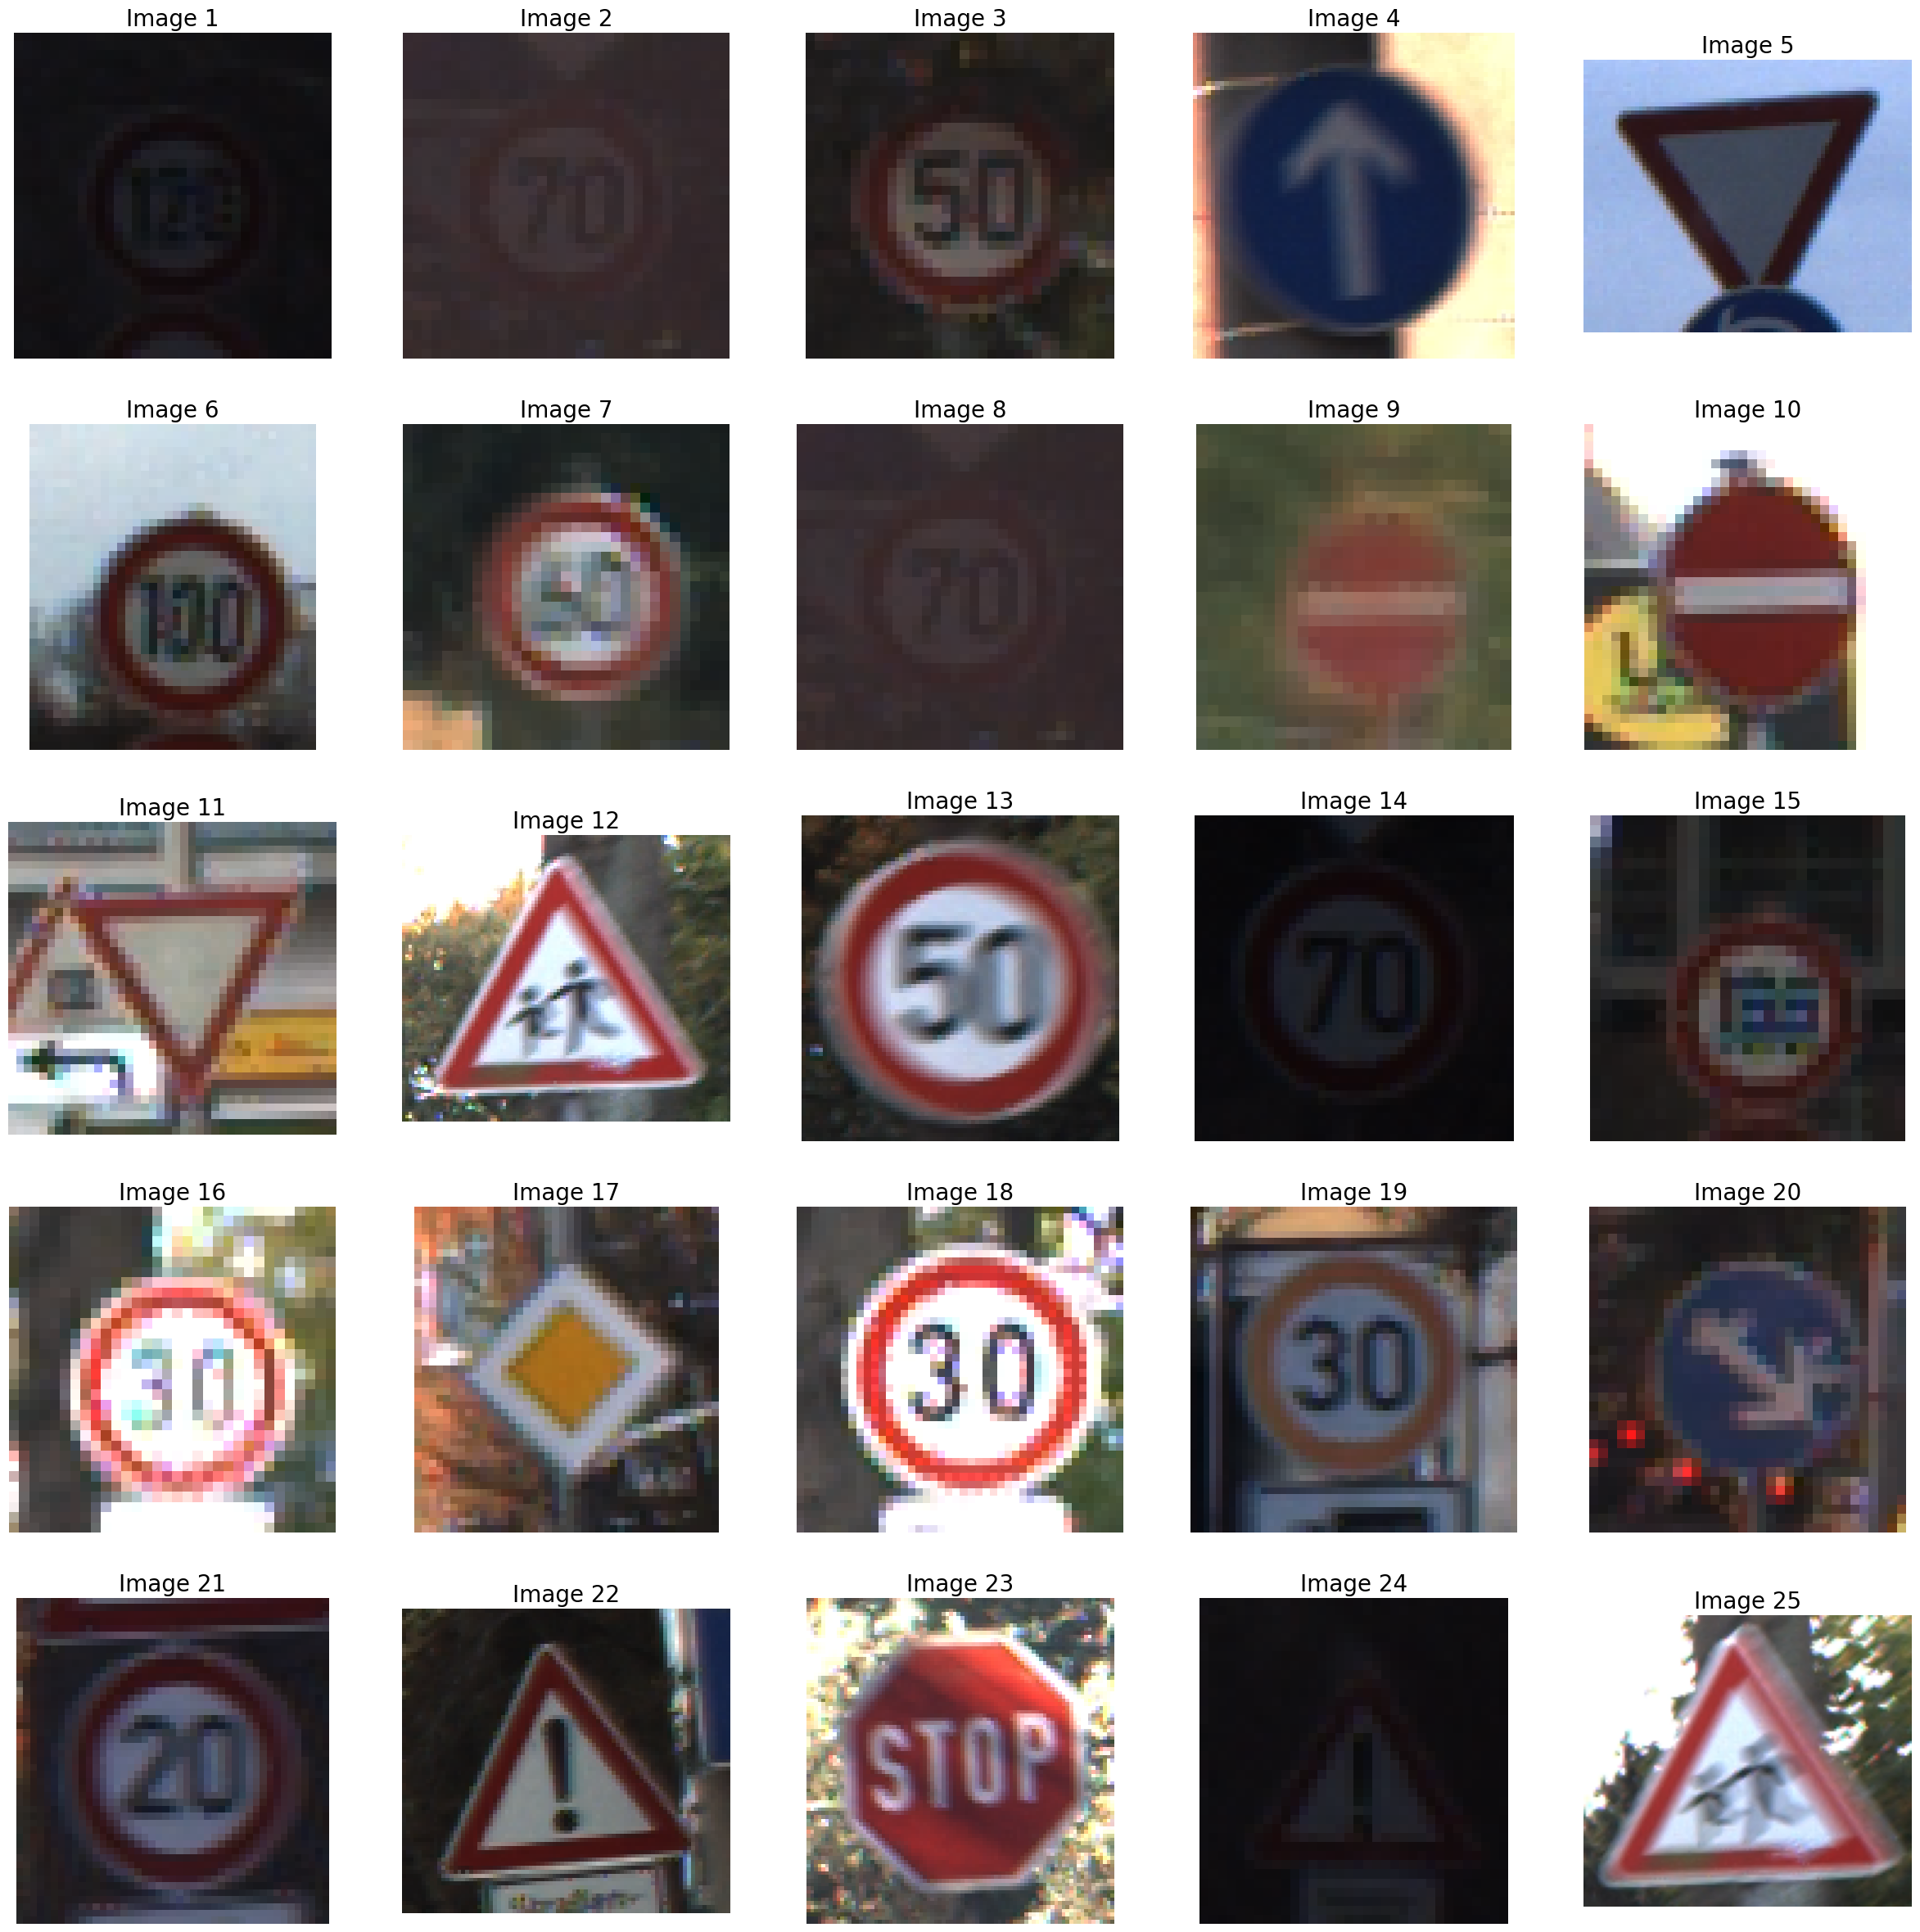

In [11]:
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Set the directory containing test images
data_dir = '../Traffic Signs Recognition/Test'

# List all image filenames in the directory
imgs = os.listdir(data_dir)

# Create a figure to display a grid of images
plt.figure(figsize=(30,30))

# Display a grid of 25 randomly selected images
for i in range(1, 26):
    plt.subplot(5, 5, i)
    
    # Choose a random image path from the list of image filenames
    random_image_path = os.path.join(data_dir, random.choice(imgs))
    
    # Read and display the random image using imread function from matplotlib
    random_image = imread(random_image_path)
    plt.imshow(random_image)
    
    # Turn off axis labels
    plt.axis('off')
    
    # Add title and image dimensions as labels
    plt.title(f"Image {i}", fontsize=20)
    plt.xlabel(f"Width: {random_image.shape[1]}", fontsize=20)
    plt.ylabel(f"Height: {random_image.shape[0]}", fontsize=20)

# Show the grid of images
plt.show()


# Let's Visualize the Training Datasets in Sorted grids formet

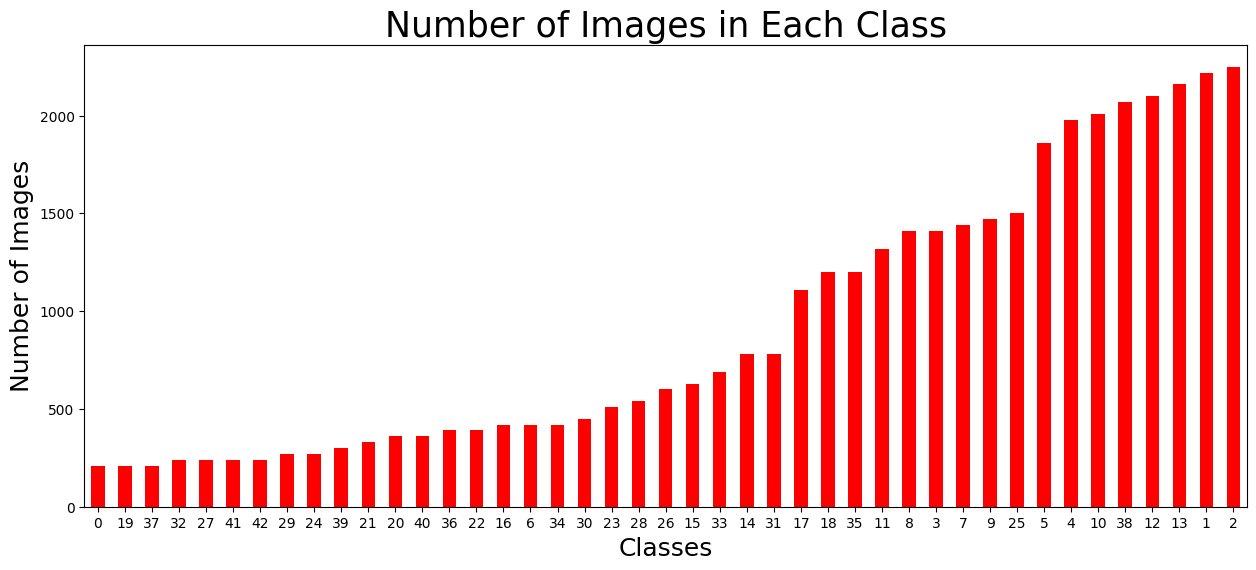

In [12]:
# Number of images in each class
data_dic = {}

# Iterate through each folder (class) in the directory
for folder in os.listdir(cur_path):
    # Count the number of images in the current folder and store it in the dictionary
    data_dic[folder] = len(os.listdir(os.path.join(cur_path, folder)))

# Convert the dictionary to a pandas Series
data_series = pd.Series(data_dic)

# Sort the Series by values (number of images)
data_series_sorted = data_series.sort_values()

# Plot the data
plt.figure(figsize=(15, 6))
data_series_sorted.plot(kind='bar', color='r')  # Create a bar plot
plt.title('Number of Images in Each Class', fontsize=25)
plt.xlabel('Classes', fontsize=18)
plt.ylabel('Number of Images', fontsize=18)
plt.xticks(rotation=0, fontsize=10)  # Rotate x-axis labels for better readability
plt.show()


# Build a CNN model

## Model Layers

### Architecture

The architecture of the American Sign Language Image Classification model consists of the following Layers and components:

#### Layers:
- **Input Layer:** This layer receives input images for classification.
- **Convolutional Layers:** The model contains three blocks of convolution with increasing filters and ReLU activation function.
- **Pooling Layers:** Each convolution block is followed by a MaxPooling layer (pool_size = 2) to reduce the spatial dimensions of the feature maps.
- **Dropout Layers:** Dropout layers with a rate of 0.2 are included after each pooling layer to prevent overfitting.
- **Fully Connected Layers:** The model includes a Flatten layer to convert the 2D feature maps into a 1D vector, followed by a Dense layer with 256 units and a Dropout layer.
- **Output Layer:** The output layer is a Dense layer with 43 units (representing the number of classes) and softmax activation function for multiclass classification.

#### Components:
- **Input Layer:** Receives input images for classification.
- **Convolutional Layers:** Extract features from the images through convolutional operations.
- **Pooling Layers:** Reduce the spatial dimensions of the feature maps.
- **Flatten Layer:** Convert the 2D feature maps into a 1D vector.
- **Fully Connected Layers:** Perform classification using densely connected layers.
- **Output Layer:** Provides the final prediction probabilities for the 43 classes representing Traffic Signs.


In [13]:
# Initialize the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Fully Connected Layers
model.add(Flatten())  # Flatten the 2D feature maps into a 1D feature vector

# Add a fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))  # Apply dropout regularization to prevent overfitting

# Output layer with 43 neurons (one for each class) and softmax activation for multi-class classification
model.add(Dense(43, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

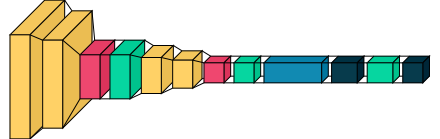

In [15]:
visualkeras.layered_view(model)

# Callbacks

In this section, we will implement two important callbacks to monitor and improve the training process:

* **ReduceLROnPlateau:** This callback dynamically adjusts the learning rate of the optimizer when a specified metric has stopped improving. It helps prevent the model from getting stuck in local minima by reducing the learning rate.
  
* **EarlyStopping:** This callback stops the training process when a monitored metric (e.g., validation loss) has stopped improving. It prevents overfitting by halting training when the model's performance on the validation set begins to degrade.

These callbacks play a crucial role in optimizing the training process and improving the overall performance of the model.

In [16]:
# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss                               
    min_delta=0.001,            # Minimum change in the monitored quantity to qualify as an improvement                               
    patience=5,                 # Number of epochs with no improvement after which training will be stopped                               
    restore_best_weights=True,  # Restore model weights to the best iteration                               
    verbose=0                   # Verbosity mode (0: silent, 1: update messages)
)

# ReduceLROnPlateau callback
reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy                                         
    patience=2,              # Number of epochs with no improvement after which learning rate will be reduced                                         
    factor=0.5,              # Factor by which the learning rate will be reduced (new_lr = lr * factor)                                        
    verbose=1                # Verbosity mode (0: silent, 1: update messages)
)


# Compile the Model

Finally, we will compile the model. There are three key components to mention here: the optimizer, the loss function, and the evaluation metrics.

* **Optimizer:** Optimizers are algorithms or methods used to minimize the cost function during training by updating the model parameters. Popular optimizers include gradient descent, stochastic gradient descent, and Adam. In this model, we are using the default optimizer, Adam.

* **Loss Function:** The loss function measures the difference between the actual output of the model and the predicted output. It quantifies how well the model is performing during training. For binary classification problems, 'binary_crossentropy' is commonly used, while 'categorical_crossentropy' is used for multiclass classification. Here, we are using binary_crossentropy as the loss function.

* **Metrics:** Metrics are used to evaluate the performance of the model. Common metrics include accuracy, precision, recall, and F1-score. We use these metrics to assess how well the model is performing on the validation or test data. In this case, we can use accuracy as the metric to measure the model's performance.

In [17]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',                 # Adam optimizer              
    loss='categorical_crossentropy',  # Categorical cross-entropy loss function           
    metrics=['accuracy']              # Accuracy metric for evaluation
)


# Fit the Model

Now, we will train our compiled model using the training data and validate it using the validation dataset during training.

We need to specify the number of steps for the training and validation iterators. This is the number of batches that will constitute one epoch. It can be determined by dividing the total number of images in the training and validation directories by the batch size (32).

The model will be trained for 30 epochs to ensure convergence and optimize its performance.


In [18]:
# Training the model
history = model.fit(
    X_train, y_train,                                 # Training data and labels
    batch_size=50,                                    # Number of samples per gradient update
    epochs=30,                                        # Number of epochs to train the model
    validation_data=(X_test, y_test),                 # Validation data and labels
    callbacks=[early_stopping, reduce_learning_rate], # Callbacks for early stopping and learning rate reduction
    verbose=1                                         # Verbosity mode. 1 for progress bar, 0 for silent.
)


Epoch 1/30
628/628 [==============================] - 43s 68ms/step - loss: 2.2396 - accuracy: 0.4378 - val_loss: 0.8300 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 2/30
628/628 [==============================] - 42s 67ms/step - loss: 0.9406 - accuracy: 0.7189 - val_loss: 0.4161 - val_accuracy: 0.8892 - lr: 0.0010
Epoch 3/30
628/628 [==============================] - 41s 66ms/step - loss: 0.6691 - accuracy: 0.7965 - val_loss: 0.2663 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 4/30
628/628 [==============================] - 41s 65ms/step - loss: 0.5467 - accuracy: 0.8330 - val_loss: 0.2192 - val_accuracy: 0.9313 - lr: 0.0010
Epoch 5/30
628/628 [==============================] - 41s 66ms/step - loss: 0.4805 - accuracy: 0.8522 - val_loss: 0.2118 - val_accuracy: 0.9388 - lr: 0.0010
Epoch 6/30
628/628 [==============================] - 43s 68ms/step - loss: 0.4370 - accuracy: 0.8647 - val_loss: 0.1663 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 7/30
628/628 [==============================] - 41s 

# Evaluation

In this section, we will evaluate the performance of our model on both the training and validation datasets by examining the accuracy and loss metrics.

It's essential to assess the model's performance on both datasets to ensure that it generalizes well to unseen data and does not overfit to the training data.

We will analyze the following metrics:
- Training accuracy
- Training loss
- Validation accuracy
- Validation loss

These metrics will provide insights into how well our model is learning and generalizing from the data.


In [21]:
# Evaluate the model on the training dataset
score = model.evaluate(X_train, y_train, verbose=1)

# Print the training loss and training accuracy
print('Train Loss:', score[0])   # Print the training loss
print('Train Accuracy:', score[1]*100)  # Print the training accuracy


981/981 [==============================] - 8s 8ms/step - loss: 0.0133 - accuracy: 0.9964
Train Loss: 0.01327588316053152
Train Accuracy: 99.63656067848206


In [22]:
# Evaluate the model on the test dataset
score = model.evaluate(X_test, y_test, verbose=1)

# Print the test loss and test accuracy
print('Test Loss:', score[0])   # Print the test loss
print('Test Accuracy:', score[1]*100)  # Print the test accuracy


246/246 [==============================] - 2s 8ms/step - loss: 0.0322 - accuracy: 0.9897
Test Loss: 0.03220411390066147
Test Accuracy: 98.9670991897583


# Plot the Results

In this section, we will visualize the results of our model training and evaluation using plots. Plotting the results helps us understand the training progress and identify any issues such as overfitting or underfitting.

We will create plots for:
- Training and validation accuracy over epochs
- Training and validation loss over epochs

These plots will provide valuable insights into the performance of our model and help us make informed decisions for further optimization.

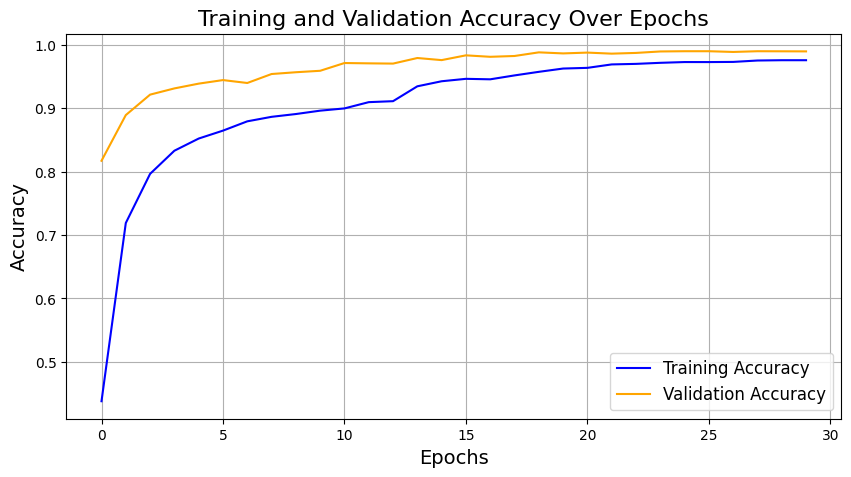

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-')

# Set plot title and labels
plt.title('Training and Validation Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add gridlines
plt.grid(True)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


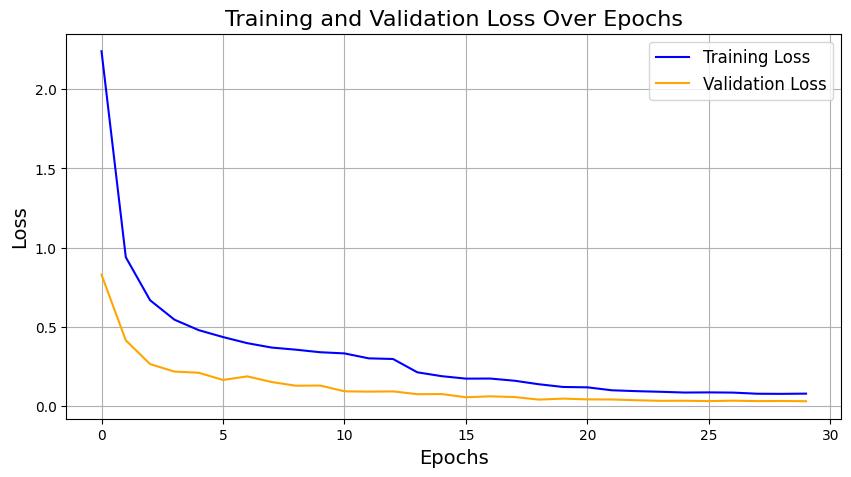

In [24]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-')

# Set plot title and labels
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add gridlines
plt.grid(True)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


# Prediction

In this section, we will use our trained model to make predictions on the test data. By predicting the labels for the test data, we can assess the accuracy and performance of our model on unseen data.

This step is crucial for evaluating the real-world effectiveness of our model and determining whether it generalizes well to new, unseen examples.

Let's proceed with making predictions and analyzing the results to understand how well our model performs on the test dataset.

In [25]:
# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels for both true labels and predicted labels
y_test_class = np.argmax(y_test, axis=1)   # Convert one-hot encoded test labels to class labels
y_pred_class = np.argmax(y_pred, axis=1)   # Convert one-hot encoded predicted labels to class labels


246/246 [==============================] - 2s 8ms/step


The count of correctly and incorrectly classified images.

In [26]:
p = y_pred_class  # Predicted class labels
y = y_test_class  # True class labels

# Get indices of correctly and incorrectly predicted classes
correct = np.nonzero(p == y)[0]     # Indices where predicted class matches true class
incorrect = np.nonzero(p != y)[0]   # Indices where predicted class does not match true class

# Print the number of correct and incorrect predictions
print("Correctly predicted classes:", correct.shape[0])      # Number of correct predictions
print("Incorrectly predicted classes:", incorrect.shape[0])  # Number of incorrect predictions


Correctly predicted classes: 7761
Incorrectly predicted classes: 81


# Classification Report

A classification report is a tool used in machine learning for evaluating the performance of a classification model. It provides a summary of various evaluation metrics such as precision, recall, F1-score, and support for each class in the classification problem.

Here's a brief overview of the metrics typically included in a classification report:

- **Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the accuracy of positive predictions.

- **Recall (also called Sensitivity or True Positive Rate):** Recall is the ratio of true positive predictions to the total number of actual positive instances in the data. It measures the ability of the model to correctly identify positive instances.

- **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. F1-score is especially useful when there is an uneven class distribution.

- **Support:** Support is the number of actual occurrences of each class in the test dataset.

The classification report typically organizes these metrics for each class in the classification problem, as well as providing an overall summary of the model's performance.

It's important to analyze the classification report to understand how well the model performs for each class and to identify any potential issues such as class imbalance, misclassification patterns, or overall model effectiveness.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.99      0.99      0.99       496
           2       0.98      0.98      0.98       420
           3       1.00      0.98      0.99       294
           4       1.00      0.99      1.00       400
           5       0.96      0.98      0.97       364
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99       313
           8       0.99      1.00      0.99       274
           9       1.00      0.99      1.00       277
          10       1.00      1.00      1.00       398
          11       0.99      0.99      0.99       261
          12       0.99      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      0.97      0.98       135
          15       1.00      1.00      1.00       118
          16       0.99      1.00      0.99        86
    

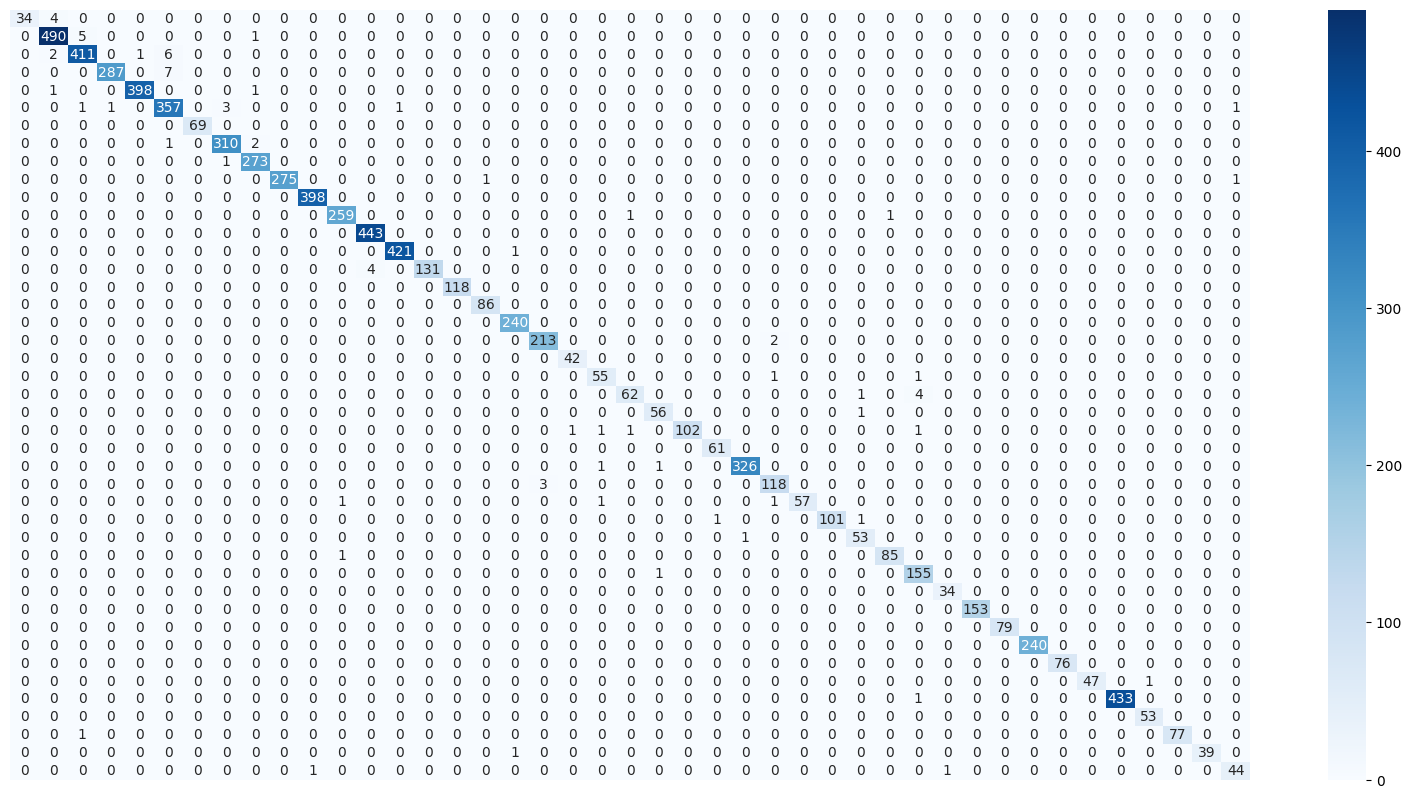

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Create a heatmap of the confusion matrix with annotations
plt.figure(figsize=(20, 10))  # Set the size of the heatmap figure
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=False, yticklabels=False)
# Plot the heatmap with annotations, using integer formatting for cell values,
# a blue color map, and without showing tick labels on x and y axes

# Save the heatmap as an image
plt.savefig('confusion_matrix.png')  # Save the heatmap as 'confusion_matrix.png' file
plt.show()  # Show the heatmap


In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score

score=accuracy_score(y_pred_class,y_test_class)
score

0.9896710022953328

In [30]:
model.save('traffic_classifier.keras')

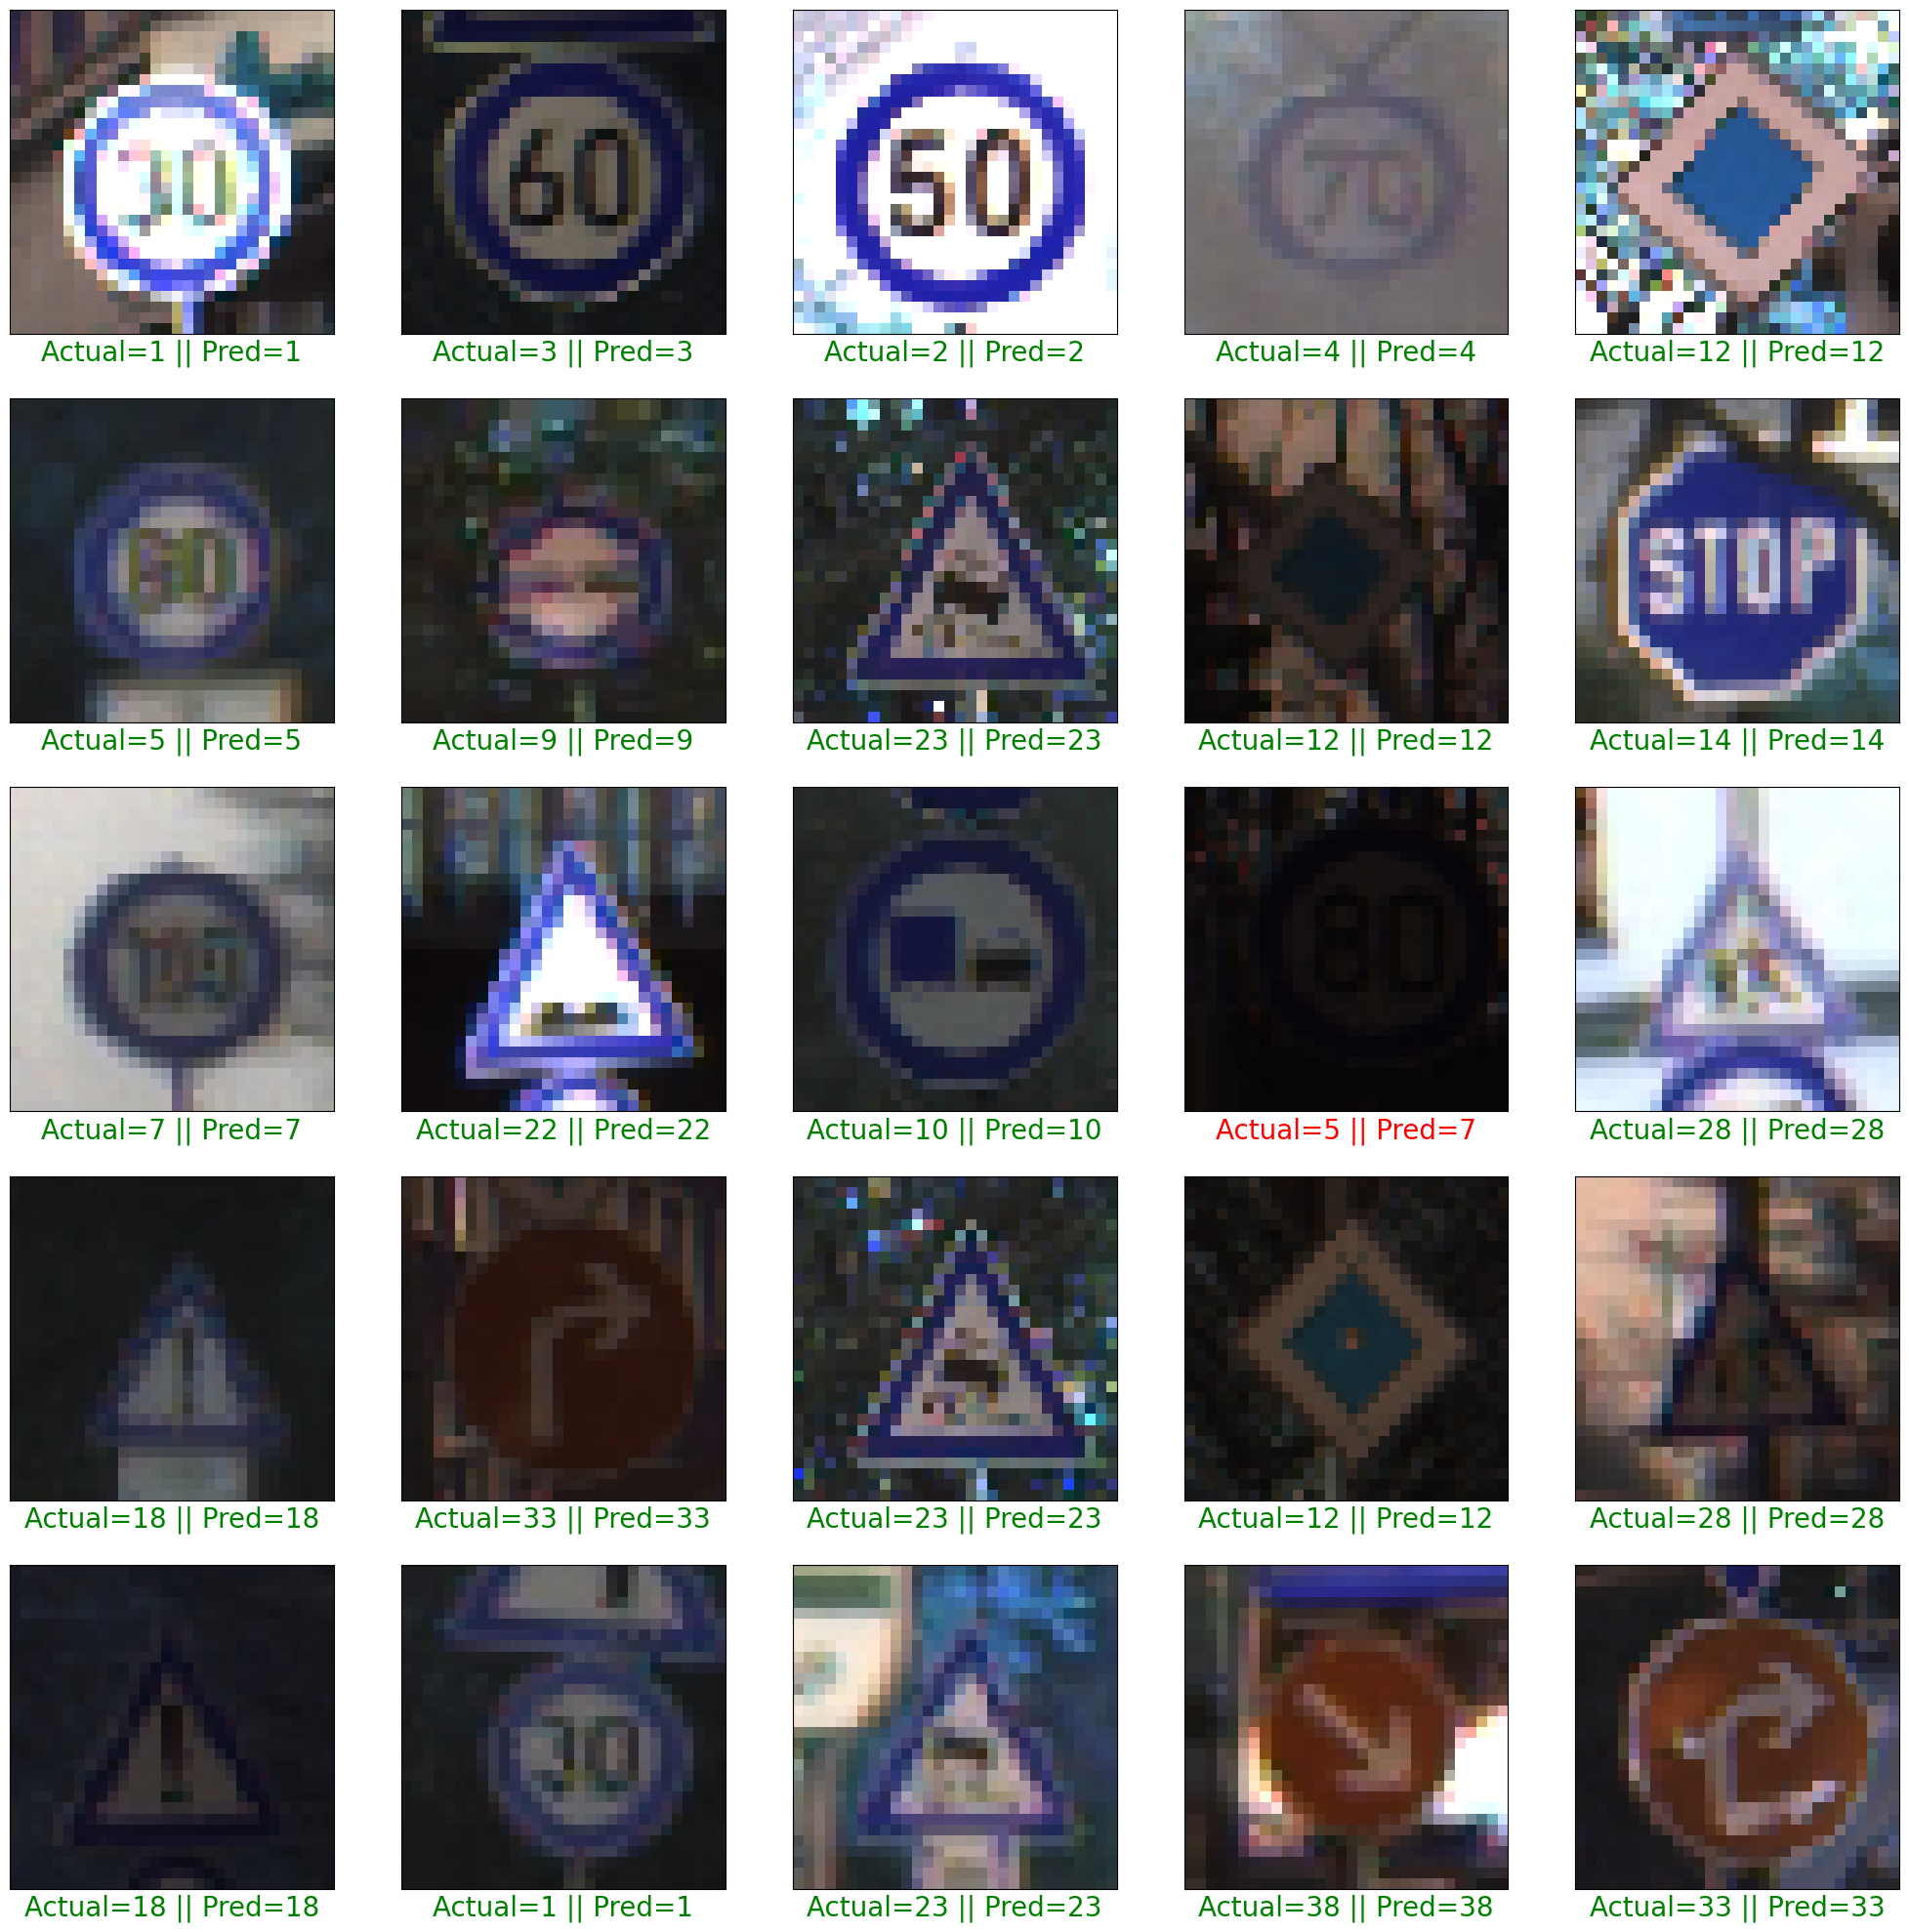

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(25, 25))

# Randomly select 25 indices from the test dataset
random_indices = np.random.choice(len(X_test), 25, replace=False)

for i, index in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Get the prediction and actual label
    prediction = y_pred_class[index]
    actual = y_test_class[index]

    # Check if the prediction matches the actual label using numpy.array_equal
    is_correct = np.array_equal(prediction, actual)

    # Set the label color based on whether the prediction is correct
    label_color = 'g' if is_correct else 'r'

    # Create a label for the image
    label_text = 'Actual={} || Pred={}'.format(actual, prediction)

    # Display the image with the label
    plt.xlabel(label_text, color=label_color, fontsize=20)
    plt.imshow(X_test[index])

plt.show()


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

# Load the trained model to classify sign
model = load_model('traffic_classifier.keras')

# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' 
          }

# Initialise GUI
top = tk.Tk()
top.geometry('1080x720')
top.title('Traffic Sign classification')
top.configure(background='#CDCDCD')

# Function to classify the uploaded image
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict(image)
    pred_class = numpy.argmax(pred) + 1
    sign = classes[pred_class]
    print(sign)
    label.configure(foreground='#011638', text=sign)

# Function to display 'Classify Image' button
def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

# Function to upload an image
def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 4.25), (top.winfo_height() / 4.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

# Button to trigger image upload
upload = Button(top, text="Upload an image", command=upload_image, padx=30, pady=10)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

# Label to display the uploaded image
sign_image = Label(top)
sign_image.pack(side=BOTTOM, expand=True)

# Label to display the classification result
label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
label.pack(side=BOTTOM, expand=True)

# Heading label
heading = Label(top, text="Know Your Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()
